# Model Training

In [1]:
# Set root directory of the project as the current working directory
import os
initial_dir = os.getcwd()  # Save initial directory (notebooks/)
os.chdir('..')  # Move to project/

# Import necessary modules
from config.defaults import Config
from src.models import load_preprocessed_data, train_lstm_model, train_cnn_model
from src.utils import plot_training_history
from src.evaluation import evaluate_regression_model, evaluate_classification_model

# Load the default configuration
config = Config()

## LSTM

2025-03-25 10:44:08,510 - INFO - Loaded preprocessed data and metadata for lstm_regression with EOL 0.8
2025-03-25 10:44:08,511 - INFO - Input shape derived from X_train: (20, 1)
2025-03-25 10:44:08,597 - INFO - LSTM model built with tuned config: Config(project_name='Experiment1', data_path='data/Aachen/raw/Degradation_Prediction_Dataset_ISEA.mat', eol_capacity=0.8, test_cell_count=3, random_state=42, log_transform=False, classification=False, seq_len=20, train_split_ratio=0.8, val_split_ratio=0.2, bins=[0, 200, 400, 600, inf], labels=['0-200', '200-400', '400-600', '600+'], batch_size=32, max_trials=20, tuning_epochs=50, tuner_directory='experiments/hyperparameter_tuning', lstm_units=48, lstm_dropout_rate=0.1, lstm_dense_units=16, learning_rate=0.01, clipnorm=1.0, epochs=50, patience=20, conv1_filters=32, conv1_kernel_size=11, conv2_filters=64, conv2_kernel_size=7, conv3_filters=64, conv3_kernel_size=5, l2_reg=0.001, cnn_dense_units=64, cnn_dropout_rate=0.2)


Loaded best hyperparameters from experiments/hyperparameter_tuning/Experiment1_lstm_regression_tuning_eol80_best_params.json: {'lstm_units': 48, 'lstm_dropout_rate': 0.1, 'lstm_dense_units': 16, 'learning_rate': 0.01, 'clipnorm': 1.0}
Epoch 1/50
418/428 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0231 - mae: 0.1082
Epoch 1: val_loss improved from inf to 0.01762, saving model to experiments/models/lstm_regression_eol80_20250325_104408_best.keras
428/428 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0229 - mae: 0.1079 - val_loss: 0.0176 - val_mae: 0.0987
Epoch 2/50
425/428 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0164 - mae: 0.0919
Epoch 2: val_loss improved from 0.01762 to 0.01592, saving model to experiments/models/lstm_regression_eol80_20250325_104408_best.keras
428/428 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0164 - mae: 0.0919 - val_loss: 0.0159 - val_mae: 0.0874
Epoch 3/50
411/428 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0134 - mae: 0.0817
Epoch 3: val_loss improved from 0.01592 

2025-03-25 10:45:23,957 - INFO - Final LSTM model saved to experiments/models/lstm_regression_eol80_20250325_104408_final.keras


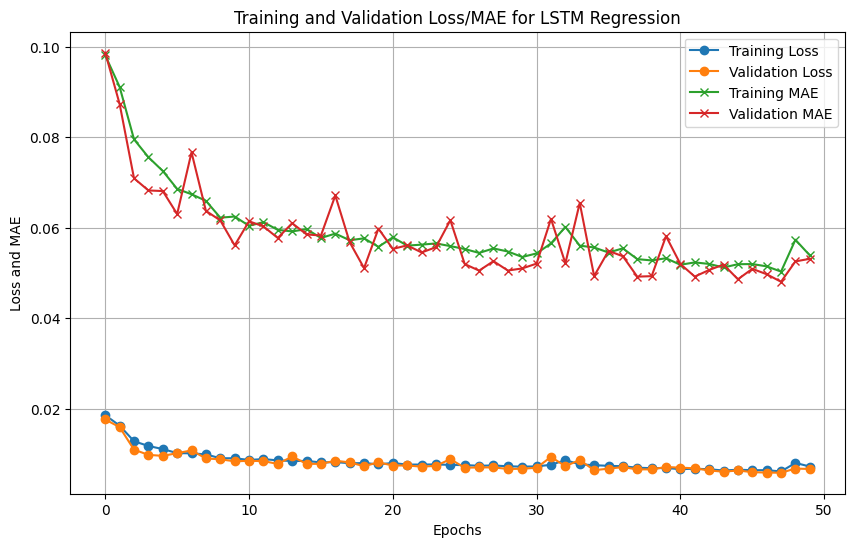

In [2]:
model_task = "lstm_regression"
dataset = "MIT_Stanford"

# Load preprocessed data
X_train, X_val, X_test, y_train, y_val, y_test, metadata = load_preprocessed_data(
    model_task, config.eol_capacity, dataset=dataset
)

# Update the configuration to use the best hyperparameters found in the hyperparameter tuning step
config.load_best_params(model_task)

lstm_model, history = train_lstm_model(config, X_train, y_train, X_val, y_val)

# Plot the training history
plot_training_history(history, model_task)

## CNN

2025-03-25 12:23:59,535 - INFO - Loaded preprocessed data and metadata for cnn_classification with EOL 0.8
2025-03-25 12:23:59,583 - INFO - CNN model built with tuned config: Config(project_name='Experiment1', data_path='data/Aachen/raw/Degradation_Prediction_Dataset_ISEA.mat', eol_capacity=0.8, test_cell_count=3, random_state=42, log_transform=False, classification=False, seq_len=20, train_split_ratio=0.8, val_split_ratio=0.2, bins=[0, 200, 400, 600, inf], labels=['0-200', '200-400', '400-600', '600+'], batch_size=32, max_trials=20, tuning_epochs=50, tuner_directory='experiments/hyperparameter_tuning', lstm_units=32, lstm_dropout_rate=0.2, lstm_dense_units=16, learning_rate=0.001, clipnorm=1.0, epochs=50, patience=20, conv1_filters=64, conv1_kernel_size=5, conv2_filters=48, conv2_kernel_size=1, conv3_filters=64, conv3_kernel_size=5, l2_reg=0.0005, cnn_dense_units=96, cnn_dropout_rate=0.4)


Loaded best hyperparameters from experiments/hyperparameter_tuning/Experiment1_cnn_classification_tuning_eol80_best_params.json: {'conv1_filters': 64, 'conv1_kernel_size': 5, 'l2_reg': 0.0005, 'conv2_filters': 48, 'conv2_kernel_size': 1, 'cnn_dense_units': 96, 'cnn_dropout_rate': 0.4, 'learning_rate': 0.001}
Epoch 1/50
403/428 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5427 - loss: 1.1371
Epoch 1: val_loss improved from inf to 1.21779, saving model to experiments/models/cnn_classification_eol80_20250325_122359_best.keras
428/428 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5456 - loss: 1.1299 - val_accuracy: 0.5001 - val_loss: 1.2178
Epoch 2/50
420/428 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6569 - loss: 0.8721
Epoch 2: val_loss improved from 1.21779 to 1.01025, saving model to experiments/models/cnn_classification_eol80_20250325_122359_best.keras
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6569 - loss: 0.8722 - val_accuracy: 0.6258 - val_loss: 1.0102
Epoch 3/50

2025-03-25 12:24:38,219 - INFO - Final CNN model saved to experiments/models/cnn_classification_eol80_20250325_122438_final.keras


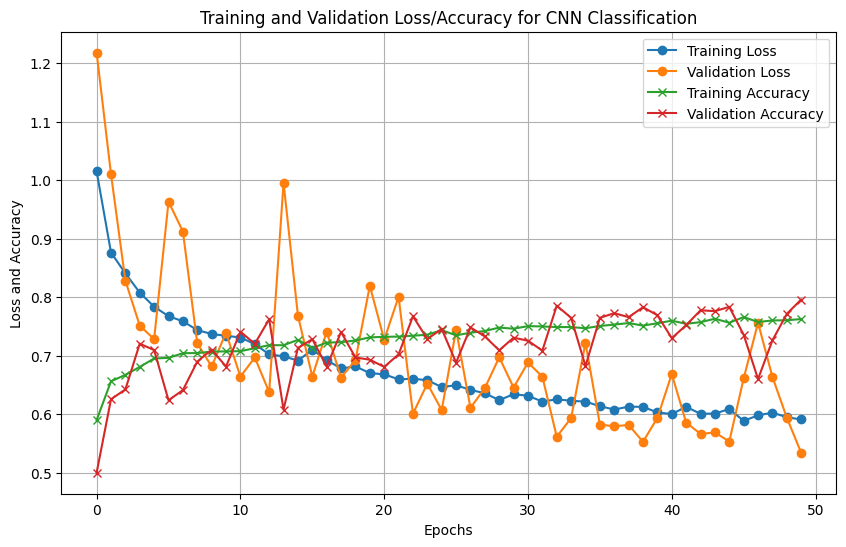

In [2]:
model_task = "cnn_classification"
dataset = "MIT_Stanford"


# Load preprocessed data
X_train, X_val, X_test, y_train, y_val, y_test, metadata = load_preprocessed_data(
    model_task, config.eol_capacity, dataset=dataset
)

# Update the configuration to use the best hyperparameters found in the hyperparameter tuning step
config.load_best_params(model_task)

cnn_model, history = train_cnn_model(config, X_train, y_train, X_val, y_val)

# Plot the training history
plot_training_history(history, model_task)